In [72]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import csv

from collections import OrderedDict
from adjustText import adjust_text


In [170]:
plt.tight_layout()
def plot_line(obj_dict, fname='', ylabel = 'BLEU', xlabel = '', yticks='', loc="upper left", ylimit=[], xlimit=[], legend=True):
    line_opt=dict(linewidth=3, markersize=12)
    fig = plt.figure(figsize=(10, 10))
    axes = fig.add_subplot(1, 1, 1)
    marker_list=["o", "v", "s", "D", "x", "*"]
    color_list=["red", "blue"]
    
#     axes.set_xlim(xmin * inc_factor, xmax * inc_factor)
#     axes.set_ylim(-1, 13)
#     axes.set_xlim(-1, len(x))
#     axes.set_yscale("log")
    
    if ylimit != []:
        axes.set_ylim(ylimit[0], ylimit[1])
        
    if xlimit != []:
        axes.set_xlim(xlimit[0], xlimit[1])
        
    
    axes.spines['right'].set_color('black')
    axes.spines['top'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_color('black')
    
    axes.spines['right'].set_linewidth(3)
    axes.spines['top'].set_linewidth(3)
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    labelsize=35
    
    axes.tick_params(labelsize=labelsize)
    
    vaalign=["bottom", "top"]
    haalign=["left", "left"]

    for i, key in enumerate(obj_dict):
        name = key
        print(obj_dict)
        print(key)
        print(obj_dict[key])
        axes.plot(range(len(obj_dict[key])), 
                  obj_dict[key], 
                  label=name, **line_opt,
                  marker=marker_list[i],
                  color=color_list[i]) 
        texts = [axes.text(x, y, '%s' % y, ha=haalign[i], va=vaalign[i], fontsize=labelsize) for x,y in zip(range(len(obj_dict[key])), obj_dict[key])]
#         adjust_text(texts)
#     axes.legend(loc='upper right', prop={'size': 20})
    axes.legend(prop={'size': labelsize}, loc=loc)
#     axes.set_xlabel('epoch', fontsize=25)
    axes.set_ylabel(ylabel, fontsize=labelsize)
    axes.set_xticks(range(len(obj_dict[key])))
    axes.grid(True)
    
    if yticks != '':
        axes.set_yticks(yticks)
    
    if xlabel != '':
        axes.set_xticklabels(xlabel)
    
    if fname != '':
        fig.savefig(fname, bbox_inches='tight')
    
    plt.show()

<Figure size 432x288 with 0 Axes>

In [73]:
def read_csv(fname, label):
    rows = []
    with open(fname, newline="") as fin:
        csvreader = csv.reader(fin, delimiter=',')
        for row in csvreader:
            rows.append(row)
    ticks = [x[0] for x in rows]
    
    res = OrderedDict([])
    for i, name in enumerate(label):
        res[name] = [round(float(x[i+1]), 1) for x in rows]
    return res, ticks

In [74]:
bleu_para,  para_ticks= read_csv("bleu_para.csv", ["noisy ST", "baseline"])
print(bleu_para)
print(para_ticks)

OrderedDict([('noisy ST', [5.3, 20.4, 26.2, 29.3]), ('baseline', [2.0, 15.6, 23.2, 28.3])])
['10K', '100K', '640K', '3.9M']


OrderedDict([('noisy ST', [5.3, 20.4, 26.2, 29.3]), ('baseline', [2.0, 15.6, 23.2, 28.3])])
noisy ST
[5.3, 20.4, 26.2, 29.3]
OrderedDict([('noisy ST', [5.3, 20.4, 26.2, 29.3]), ('baseline', [2.0, 15.6, 23.2, 28.3])])
baseline
[2.0, 15.6, 23.2, 28.3]


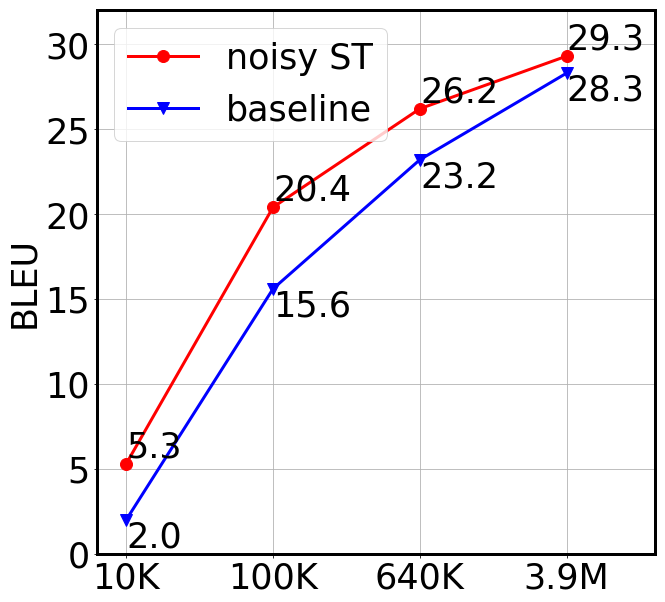

In [173]:
plot_line(bleu_para, xlabel=para_ticks, ylimit=[0,32], xlimit=[-0.2, 3.6], fname="analysis-para.pdf")

In [122]:
bleu_mono, mono_ticks=read_csv("bleu_mono.csv", ["noisy ST"])
print(bleu_mono)
print(mono_ticks)

OrderedDict([('noisy ST', [15.6, 16.6, 17.4, 18.7, 19.3, 19.2])])
['0', '100K', '500K', '1.5M', '3.8M', '20M']


OrderedDict([('noisy ST', [15.6, 16.6, 17.4, 18.7, 19.3, 19.2])])
noisy ST
[15.6, 16.6, 17.4, 18.7, 19.3, 19.2]


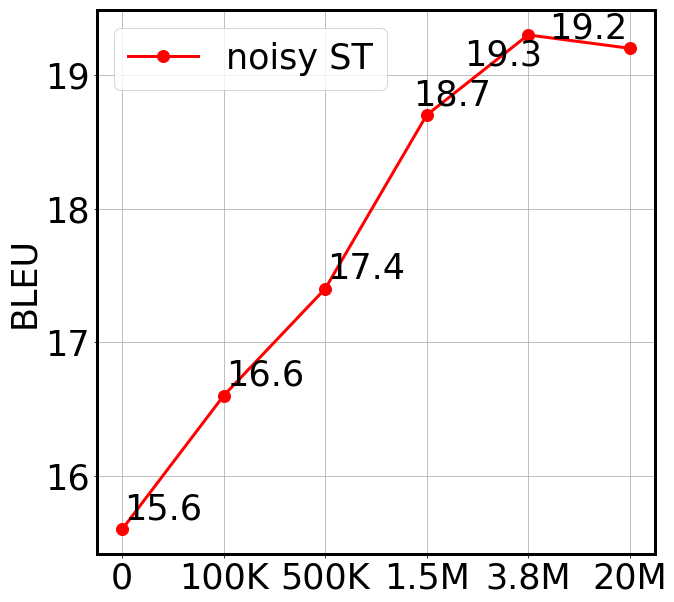

In [146]:
yticks = range(16, 20)
plot_line(bleu_mono, xlabel=mono_ticks, yticks=yticks, fname="analysis-mono.pdf")

In [107]:
bleu_noise, noise_ticks=read_csv("bleu_noise.csv", ["noisy ST"])
print(bleu_noise)
print(noise_ticks)

OrderedDict([('noisy ST', [17.9, 19.3, 19.2, 18.7, 17.9])])
['ST', '0.2', '0.4', '0.6', '0.8']


OrderedDict([('noisy ST', [17.9, 19.3, 19.2, 18.7, 17.9])])
noisy ST
[17.9, 19.3, 19.2, 18.7, 17.9]


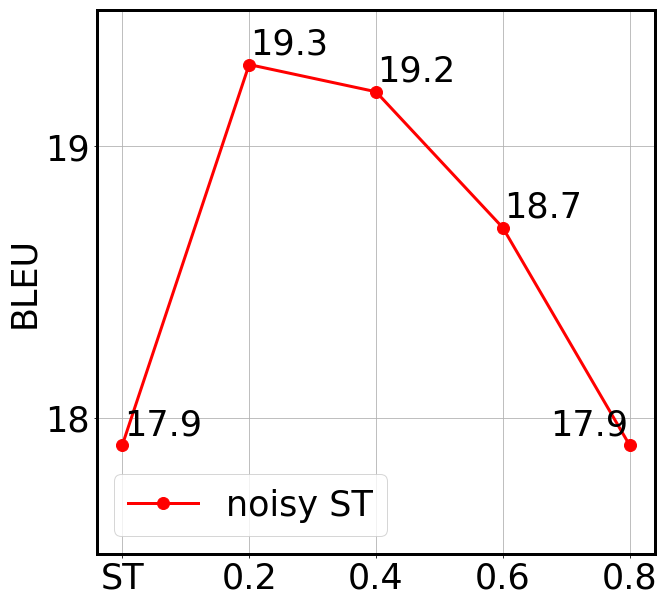

In [147]:
plot_line(bleu_noise, xlabel=noise_ticks, yticks=range(18, 20), ylimit=[17.5, 19.5], 
          loc="lower left", fname="analysis-noise.pdf")